In [ ]:
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
import seaborn as sns
import gc
import warnings
warnings.filterwarnings("ignore")

from pandas_profiling import ProfileReport

In [ ]:
url = "https://www.worldometers.info/coronavirus/#countries"
req = Request(url, headers = {'User-Agent' : "Mozilla/5.0"})

webpage = urlopen(req)
page_soup = soup(webpage, "html.parser")

In [ ]:
today = datetime.now()

yerterday_str = "%s %d, %d" %(date.today().strftime("%b"), today.day-1, today.year)
yerterday_str

'May 12, 2021'

In [ ]:
from bs4 import BeautifulSoup as soup
from datetime import date, datetime
from urllib.request import Request, urlopen

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
table = page_soup.findAll("table", {"id": "main_table_countries_yesterday"})

containers = table[0].findAll("tr", {"style":""})
title = containers[0]

In [ ]:
del containers[0]

all_data = []
clean = True

for country in containers:
  country_data = []
  country_container = country.findAll("td")

  if country_container[1].text == "China":
    continue
  for i in range(1, len(country_container)):
    final_feature = country_container[i].text
    if clean :
      if i != 1 and i != len(country_container)-1:
        final_feature = final_feature.replace(",","")

        if final_feature.find('+') != -1:
          final_feature = final_feature.replace("+","")
          final_feature = float(final_feature)
        elif final_feature.find('-') != -1:
          final_feature = final_feature.replace("-","")
          final_feature = float(final_feature)*-1
    if  final_feature == 'N/A':
        final_feature = 0
    elif final_feature == "" or final_feature == " ":
        final_feature = -1

    country_data.append(final_feature)

  all_data.append(country_data)


In [ ]:
all_data

[['World',
  '161076761',
  750247.0,
  '3344808',
  13882.0,
  '139849270',
  812156.0,
  '17882683',
  '105224',
  '20665',
  '429.1',
  -1,
  -1,
  -1,
  'All',
  '\n',
  -1,
  -1,
  -1,
  -1,
  -1],
 ['USA',
  '33586136',
  35816.0,
  '597784 ',
  843.0,
  '26620229',
  62091.0,
  '6368123',
  '8707',
  '100958',
  '1797',
  '461476543',
  '1387169',
  '332674970 ',
  'North America',
  '10',
  '557',
  '1',
  '108',
  '3',
  '19,142'],
 ['India',
  '23702832',
  362406.0,
  '258351 ',
  4126.0,
  '19728436',
  351786.0,
  '3716045',
  '8944',
  '17032',
  '186',
  '307583991',
  '221016',
  '1391679242 ',
  'Asia',
  '59',
  '5387',
  '5',
  '260',
  '3',
  '2,670'],
 ['Brazil',
  '15361686',
  76638.0,
  '428256 ',
  2545.0,
  '13924217',
  77026.0,
  '1009213',
  '8318',
  '71830',
  '2002',
  '46970130',
  '219630',
  '213860730 ',
  'South America',
  '14',
  '499',
  '5',
  '358',
  '12',
  '4,719'],
 ['France',
  '5821668',
  21498.0,
  '107119 ',
  184.0,
  '4960281',
  829

In [ ]:
df = pd.DataFrame(all_data)
df.drop([15,16,17,18,19,20], inplace = True, axis = 1)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,World,161076761,750247.0,3344808,13882.0,139849270,812156.0,17882683,105224,20665,429.1,-1,-1,-1,All
1,USA,33586136,35816.0,597784,843.0,26620229,62091.0,6368123,8707,100958,1797,461476543,1387169,332674970,North America
2,India,23702832,362406.0,258351,4126.0,19728436,351786.0,3716045,8944,17032,186,307583991,221016,1391679242,Asia
3,Brazil,15361686,76638.0,428256,2545.0,13924217,77026.0,1009213,8318,71830,2002,46970130,219630,213860730,South America
4,France,5821668,21498.0,107119,184.0,4960281,8296.0,754268,4583,89019,1638,79684856,1218458,65398090,Europe


In [ ]:
column_labels = ["Country", "Total Cases", "New Cases", "Total Deaths", "New Deaths", "Total Recovered", "New Recovered", "Active Cases",
                "Serious/Critical", "Total Cases/1M", "Deaths/1M", "Total Tests", "Test/1M", "Population", "Continent" ]
df.columns = column_labels

In [ ]:
df.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious/Critical,Total Cases/1M,Deaths/1M,Total Tests,Test/1M,Population,Continent
0,World,161076761,750247.0,3344808,13882.0,139849270,812156.0,17882683,105224,20665,429.1,-1,-1,-1,All
1,USA,33586136,35816.0,597784,843.0,26620229,62091.0,6368123,8707,100958,1797,461476543,1387169,332674970,North America
2,India,23702832,362406.0,258351,4126.0,19728436,351786.0,3716045,8944,17032,186,307583991,221016,1391679242,Asia
3,Brazil,15361686,76638.0,428256,2545.0,13924217,77026.0,1009213,8318,71830,2002,46970130,219630,213860730,South America
4,France,5821668,21498.0,107119,184.0,4960281,8296.0,754268,4583,89019,1638,79684856,1218458,65398090,Europe


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           208 non-null    object 
 1   Total Cases       208 non-null    object 
 2   New Cases         208 non-null    float64
 3   Total Deaths      208 non-null    object 
 4   New Deaths        208 non-null    float64
 5   Total Recovered   208 non-null    object 
 6   New Recovered     208 non-null    float64
 7   Active Cases      208 non-null    object 
 8   Serious/Critical  208 non-null    object 
 9   Total Cases/1M    208 non-null    object 
 10  Deaths/1M         208 non-null    object 
 11  Total Tests       208 non-null    object 
 12  Test/1M           208 non-null    object 
 13  Population        208 non-null    object 
 14  Continent         208 non-null    object 
dtypes: float64(3), object(12)
memory usage: 24.5+ KB


In [ ]:
for label in df.columns:
  if label != 'Country' and label != "Continent":
    df[label] = pd.to_numeric(df[label])

In [ ]:
df["%Inc Cases"] = df["New Cases"]/df["Total Cases"]*100
df["%Inc Deaths"] = df["New Deaths"]/df["Total Deaths"]*100
df["%Inc Recovered"] = df["New Recovered"]/df["Total Recovered"]*100

In [ ]:
cases = df[["Total Recovered", "Active Cases", "Total Deaths"]].loc[0]
cases

Total Recovered    139849270
Active Cases        17882683
Total Deaths         3344808
Name: 0, dtype: int64

In [ ]:
cases_df = pd.DataFrame(cases).reset_index()
cases_df

,index,0
0,Total Recovered,139849270
1,Active Cases,17882683
2,Total Deaths,3344808


In [ ]:
cases_df.columns = ["Type", "Total"]

cases_df["Percentage"] = np.round(100*cases_df['Total']/np.sum(cases_df["Total"]),2)
cases_df

,Type,Total,Percentage
0,Total Recovered,139849270,86.82
1,Active Cases,17882683,11.10
2,Total Deaths,3344808,2.08


In [ ]:
cases_df["Virus"] = ["COVID-19" for i in range(len(cases_df))]
cases_df

,Type,Total,Percentage,Virus
0,Total Recovered,139849270,86.82,COVID-19
1,Active Cases,17882683,11.10,COVID-19
2,Total Deaths,3344808,2.08,COVID-19


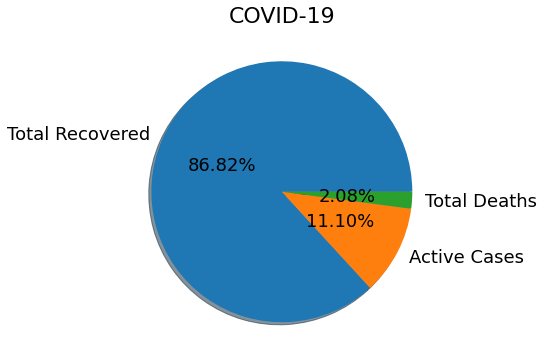

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

pie, ax = plt.subplots(figsize=[10,6])
plt.pie(cases_df.Percentage,labels=cases_df.Type, autopct="%1.2f%%",
        pctdistance=0.5, shadow=True, textprops={'fontsize': 18})
plt.title('COVID-19', fontsize=22)
#plt.axis('equal')
plt.show()

In [ ]:
cases_2 = df[["New Cases", "New Recovered", "New Deaths"]].loc[0]
cases_df_2 = pd.DataFrame(cases_2).reset_index()
cases_df_2.columns = ["Type", "Total"]

cases_df_2["Percentage"] = np.round(100*cases_df_2['Total']/np.sum(cases_df_2["Total"]),2)
cases_df_2["Virus"] = ["COVID-19" for i in range(len(cases_df_2))]
cases_df_2

,Type,Total,Percentage,Virus
0,New Cases,750247.0,47.60,COVID-19
1,New Recovered,812156.0,51.52,COVID-19
2,New Deaths,13882.0,0.88,COVID-19


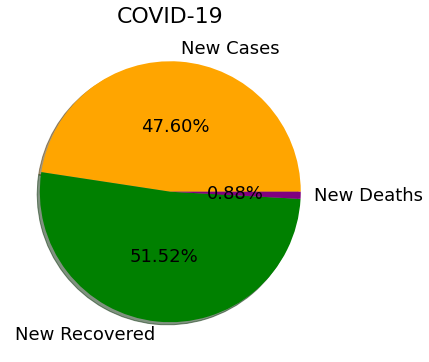

In [ ]:
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(cases_df_2.Percentage,labels=cases_df_2.Type, autopct="%1.2f%%",
        pctdistance=0.5, shadow=True, textprops={'fontsize': 18}, colors = ["orange", "green", "purple"])
plt.title('COVID-19', fontsize=22)
plt.show()

In [ ]:
per = np.round(df[["%Inc Cases","%Inc Deaths","%Inc Recovered"]].loc[0], 2)

per_df = pd.DataFrame(per)
per_df.reset_index(inplace = True)
per_df.columns = ["Daily %Increase","Percentage"]

per_df

,Daily %Increase,Percentage
0,%Inc Cases,0.47
1,%Inc Deaths,0.42
2,%Inc Recovered,0.58


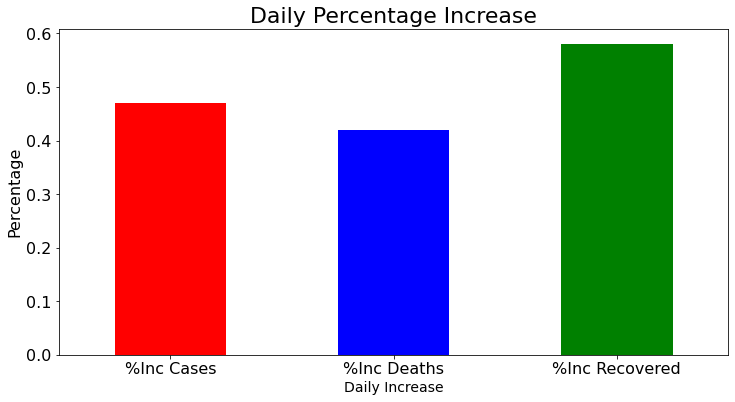

In [ ]:
ax = per_df.plot.bar(y='Percentage', x = 'Daily %Increase', rot=0, color=['red', 'blue', 'green',], 
                     figsize=[12,6])
#plt.ylabel('Percentage', fontsize=10)
ax.set_xlabel('Daily Increase', fontsize=14)
plt.xticks(fontsize=16 )
plt.yticks(fontsize=16 )
ax.set_ylabel('Percentage', fontsize=16)
plt.title('Daily Percentage Increase', fontsize=22)
ax.get_legend().remove()
plt.show()

#ax = country_1.plot.bar(y=['New Cases','New Deaths','Active Cases', 'Serious/Critical',
#      'Total Cases/1M', 'Deaths/1M', 'Test/1M'], x="Country", rot=0, figsize=[12,6])
    
#ax.set_yscale('log')
#ax.set_title('Top 5 Affected Countries')
#plt.show()

In [ ]:
continent_df = df.groupby("Continent").sum().drop("All")

continent_df

,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious/Critical,Total Cases/1M,Deaths/1M,Total Tests,Test/1M,Population,%Inc Cases,%Inc Deaths,%Inc Recovered
Continent,,,,,,,,,,,,,,,,
Africa,4699196,8857.0,125704,265.0,4235488,7659.0,338004,3072,486058.0,7289.8,45910190,4502896,1368062885,1.661285,-148.709313,-3.540668
Asia,45160933,449530.0,581739,5717.0,39223655,465513.0,5355539,32498,1253865.0,12245.0,643339461,29408032,3188909760,37.404990,-234.764985,50.465538
Australia/Oceania,65117,784.0,1215,2.0,61194,294.0,2706,-2,110534.0,1186.0,19656767,2936748,41531650,-22.855406,154.638765,-46.892363
Europe,45765613,97709.0,1041949,2485.0,41249190,144830.0,3474473,24822,3464701.0,66549.0,795995179,69308842,748020095,5.066609,-6.916283,9.284859
North America,39010114,53098.0,874583,1309.0,31120185,77737.0,7015344,16520,1157141.0,15957.0,515334988,23477251,592828537,9.487244,-79.624269,5.465187
South America,26270405,140207.0,714869,4014.0,23859221,116049.0,1696315,28256,595336.0,13814.0,109712805,3896938,433814525,9.089080,7.237203,6.579033


In [ ]:
continent_df = continent_df.reset_index()
continent_df

,Continent,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious/Critical,Total Cases/1M,Deaths/1M,Total Tests,Test/1M,Population,%Inc Cases,%Inc Deaths,%Inc Recovered
0,Africa,4699196,8857.0,125704,265.0,4235488,7659.0,338004,3072,486058.0,7289.8,45910190,4502896,1368062885,1.661285,-148.709313,-3.540668
1,Asia,45160933,449530.0,581739,5717.0,39223655,465513.0,5355539,32498,1253865.0,12245.0,643339461,29408032,3188909760,37.404990,-234.764985,50.465538
2,Australia/Oceania,65117,784.0,1215,2.0,61194,294.0,2706,-2,110534.0,1186.0,19656767,2936748,41531650,-22.855406,154.638765,-46.892363
3,Europe,45765613,97709.0,1041949,2485.0,41249190,144830.0,3474473,24822,3464701.0,66549.0,795995179,69308842,748020095,5.066609,-6.916283,9.284859
4,North America,39010114,53098.0,874583,1309.0,31120185,77737.0,7015344,16520,1157141.0,15957.0,515334988,23477251,592828537,9.487244,-79.624269,5.465187
5,South America,26270405,140207.0,714869,4014.0,23859221,116049.0,1696315,28256,595336.0,13814.0,109712805,3896938,433814525,9.089080,7.237203,6.579033


In [ ]:
def continent_visualization(v_list):
  for label in v_list:
    c_df = continent_df[['Continent', label]]
    c_df['Percentage'] = np.round(100*c_df[label]/np.sum(c_df[label]), 2)
    c_df["Virus"] = ["COVID-19" for i in range(len(c_df))]

    pie, ax = plt.subplots(figsize=[10,6])
    plt.pie(c_df.Percentage,labels=c_df.Continent, autopct="%1.2f%%",
              pctdistance=0.5, shadow=True, textprops={'fontsize': 18})
    plt.title(label, fontsize=22)
    plt.show()

In [ ]:
cases_list = ["Total Cases", "Active Cases", "New Cases", "Serious/Critical", "Total Cases/1M"]

deaths_list = ["Total Deaths", "New Deaths", "Deaths/1M"]

recovered_list = ["Total Recovered", "New Recovered", "%Inc Recovered"]

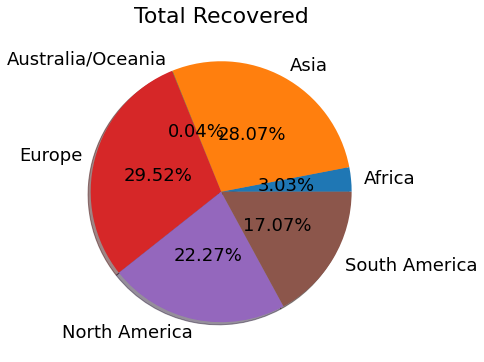

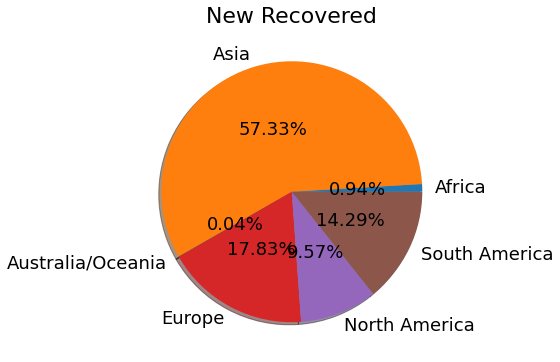

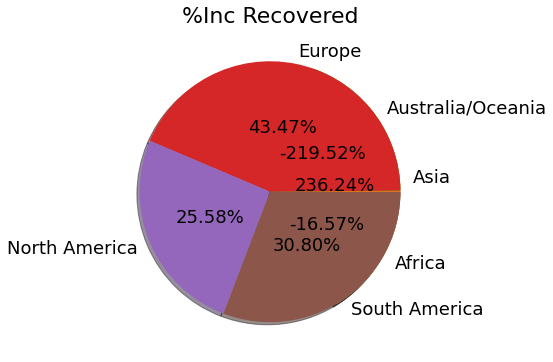

In [ ]:
continent_visualization(recovered_list)

In [ ]:
df = df.drop(len(df)-1)
country_df = df.drop([0])
country_df

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious/Critical,Total Cases/1M,Deaths/1M,Total Tests,Test/1M,Population,Continent,%Inc Cases,%Inc Deaths,%Inc Recovered
1,USA,33586136,35816.0,597784,843.0,26620229,62091.0,6368123,8707,100958.0,1797.0,461476543,1387169,332674970,North America,0.106639,0.141021,0.233247
2,India,23702832,362406.0,258351,4126.0,19728436,351786.0,3716045,8944,17032.0,186.0,307583991,221016,1391679242,Asia,1.528957,1.597052,1.783142
3,Brazil,15361686,76638.0,428256,2545.0,13924217,77026.0,1009213,8318,71830.0,2002.0,46970130,219630,213860730,South America,0.498891,0.594271,0.553180
4,France,5821668,21498.0,107119,184.0,4960281,8296.0,754268,4583,89019.0,1638.0,79684856,1218458,65398090,Europe,0.369276,0.171772,0.167249
5,Turkey,5072462,13029.0,43821,232.0,4801291,35167.0,227350,2827,59592.0,515.0,50058648,588097,85119750,Asia,0.256858,0.529427,0.732449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Anguilla,109,-1.0,-1,-1.0,89,-1.0,20,-1,7210.0,-1.0,21630,1430745,15118,North America,-0.917431,100.000000,-1.123596
203,Saint Kitts and Nevis,45,-1.0,-1,-1.0,44,-1.0,1,-1,841.0,-1.0,13691,255797,53523,North America,-2.222222,100.000000,-2.272727
204,Vatican City,27,-1.0,-1,-1.0,15,-1.0,12,-1,33624.0,-1.0,-1,-1,803,Europe,-3.703704,100.000000,-6.666667
205,Western Sahara,10,-1.0,1,-1.0,8,-1.0,1,-1,16.0,2.0,-1,-1,609911,Africa,-10.000000,-100.000000,-12.500000


In [ ]:
country = country_df.columns[1:14]
country

Index(['Total Cases', 'New Cases', 'Total Deaths', 'New Deaths',
       'Total Recovered', 'New Recovered', 'Active Cases', 'Serious/Critical',
       'Total Cases/1M', 'Deaths/1M', 'Total Tests', 'Test/1M', 'Population'],
      dtype='object')

In [ ]:
country_1 = country_df.iloc[0:5,0:14]
country_1

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,Serious/Critical,Total Cases/1M,Deaths/1M,Total Tests,Test/1M,Population
1,USA,33586136,35816.0,597784,843.0,26620229,62091.0,6368123,8707,100958.0,1797.0,461476543,1387169,332674970
2,India,23702832,362406.0,258351,4126.0,19728436,351786.0,3716045,8944,17032.0,186.0,307583991,221016,1391679242
3,Brazil,15361686,76638.0,428256,2545.0,13924217,77026.0,1009213,8318,71830.0,2002.0,46970130,219630,213860730
4,France,5821668,21498.0,107119,184.0,4960281,8296.0,754268,4583,89019.0,1638.0,79684856,1218458,65398090
5,Turkey,5072462,13029.0,43821,232.0,4801291,35167.0,227350,2827,59592.0,515.0,50058648,588097,85119750


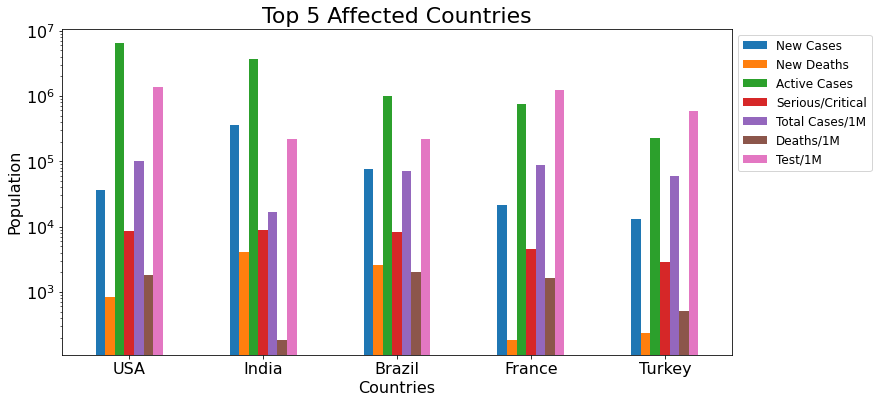

In [ ]:
ax = country_1.plot.bar(y=['New Cases','New Deaths','Active Cases', 'Serious/Critical',
      'Total Cases/1M', 'Deaths/1M', 'Test/1M'], x="Country", rot=0, figsize=[12,6])
    
ax.set_yscale('log')
ax.set_xlabel('Countries', fontsize=16)
plt.xticks(fontsize=16 )
plt.yticks(fontsize=16 )
plt.legend(loc= 'best', bbox_to_anchor=(1, 1), fontsize=12)
ax.set_ylabel('Population', fontsize=16)
ax.set_title('Top 5 Affected Countries', fontsize=22)
plt.show()